### 时间序列分析(Time Series Analysis)

>**时间序列：**一系列以时间顺序作为索引的数据点的集合。一般通过折线图绘制。

    时间序列数据具有自然的时间顺序。这使得时间序列分析不同于截面数据(cross-sectional data)研究，其中没有观察的自然顺序。时间序列分析也不同于空间数据(spatial data)分析，其中观测通常与地理位置相关（例如交通运输或是气象方面的数据）。

    时间序列分析包括用于分析时间序列数据的方法，以便提取有意义的统计数据和数据的其他特征。时间序列分析可应用于实值，连续数据，离散数字数据或离散符号数据（即字符序列，如英语中的字母和单词）。在统计，信号处理，模式识别，计量经济学，数学金融，天气预报，地震预测，脑电图，控制工程，天文学，通信工程，以及主要涉及时间测量的任何应用科学和工程领域均有应用。

#### 常用时间序列分析算法

    时间序列的常用算法包括移动平均（MA, Moving Average）、指数平滑（ES, Exponential Smoothing）、自回归移动平均模型（ARMA , Auto-regressive Moving Average Model）三大主要类别，每个类别又可以细分和延伸出多种算法。


#### 平稳性(Stationarity)

平稳性是做时间序列分析的前提条件，所谓平稳通俗理解就是数据没有随着时间呈现明显的趋势和规律，例如剧烈波动、递增、递减等，而是相对均匀且随机地分布在均值附近。

>为什么平稳性如此重要？

    因为现在大多数的时间序列模型，或多或少都是基于未来序列与目前已观测到的序列数据有着相同的统计特性(均值、方差等) 的假设。也就是说，如果原始序列（已观测序列）是不平稳的，那么我们现有模型的预测结果，就可能会出错。

平稳性检验：
- 观察法：通过输出时间序列图判断数据是否平稳。
- 单位根检验：通过ADF检验得到的显著性水平分析数据是否平稳。`statsmodels.tsa.stattools.adfuller`
- [自相关](#ac)和偏相关法：通过观察时间序列的自相关和偏相关函数数分析数据是否平稳。

平稳化方法：

- 对数变换：减小数据的振荡幅度，使其线性规律更加明显
- 平滑处理：[移动平均](#ma)、[指数平滑](#ema)
- [差分](#difference)：对等周期间隔的数据进行线性求减
- [分解](#decompose)：statsmodels使用的X-11分解过程，可将时序数据分离成长期趋势、季节趋势和随机成分。

#### 涉及到的python库

pandas, numpy, matplotlib, scipy, seaborn, statsmodels...



**数据获取与展示**

In [2]:
## Importing Packages and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts

tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  # 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)

df = pro.daily(ts_code='000001.SZ', start_date='20200101', end_date='20201210').iloc[::-1, :]
cprice = df[['trade_date','close']].set_index('trade_date')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
227,000001.SZ,20200102,16.65,16.95,16.55,16.87,16.45,0.42,2.5532,1530231.87,2571196.482
226,000001.SZ,20200103,16.94,17.31,16.92,17.18,16.87,0.31,1.8376,1116194.81,1914495.474
225,000001.SZ,20200106,17.01,17.34,16.91,17.07,17.18,-0.11,-0.6403,862083.50,1477930.193
224,000001.SZ,20200107,17.13,17.28,16.95,17.15,17.07,0.08,0.4687,728607.56,1247047.135
223,000001.SZ,20200108,17.00,17.05,16.63,16.66,17.15,-0.49,-2.8571,847824.12,1423608.811
...,...,...,...,...,...,...,...,...,...,...,...
4,000001.SZ,20201204,19.47,19.47,18.97,19.30,19.54,-0.24,-1.2282,891347.84,1707639.065
3,000001.SZ,20201207,19.31,19.39,18.68,18.91,19.30,-0.39,-2.0207,873806.61,1655173.465
2,000001.SZ,20201208,18.92,19.03,18.53,18.71,18.91,-0.20,-1.0576,719647.51,1345951.734
1,000001.SZ,20201209,18.79,19.05,18.68,18.71,18.71,0.00,0.0000,677221.15,1277484.440


<AxesSubplot:xlabel='trade_date'>

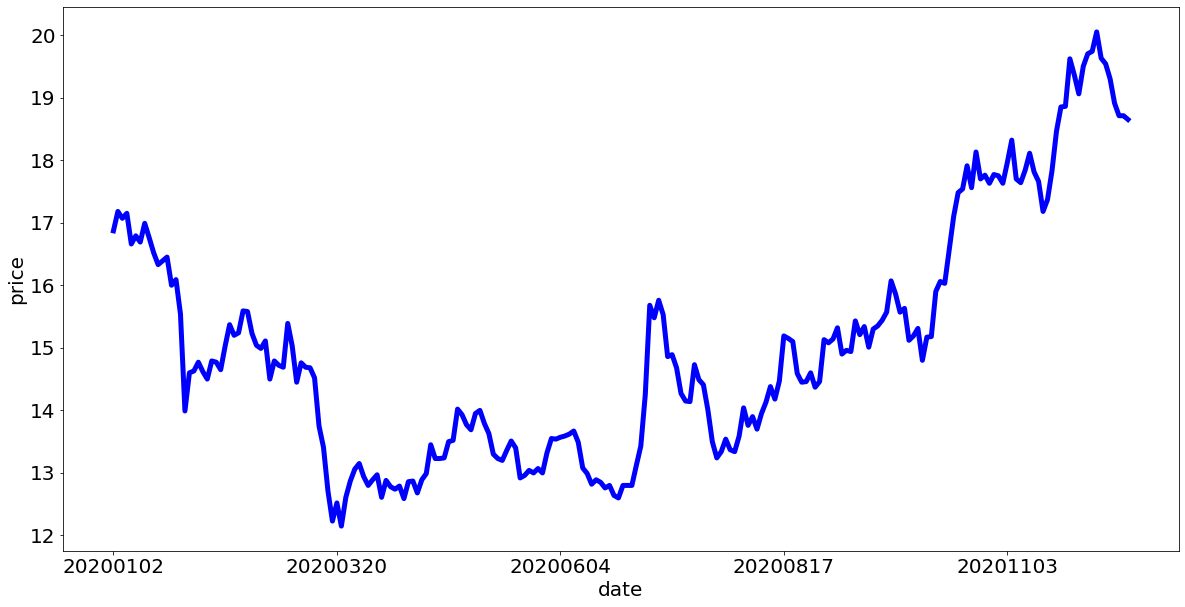

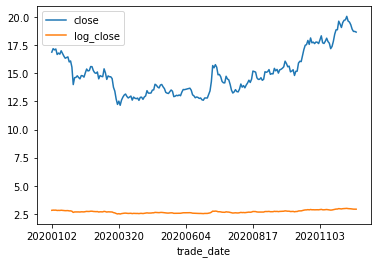

In [88]:
cprice['close'].plot(figsize=(20,10), linewidth=5, fontsize=20, color = 'blue')
plt.xlabel('date', fontsize=20);
plt.ylabel('price', fontsize=20)

cprice['log_close']=np.log(cprice['close'])
cprice[['close','log_close']].plot()

#### plot double y-axis figure

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.plot(cprice['close'], color='r', label='close')
# ax1.set_ylabel('price')
# # ax1.set_legend("close")
# ax2 = ax1.twinx()  ## the important function for plotting double y-axis figure
# ax2.plot(cprice['log_close'], color='g', label='log_close')
# ax2.set_xticks(cprice.index[::50])
# ax2.set_ylabel('log price')
# ax2.set_xlabel('date')
 
# plt.show()

### Identifying Trends in Time Series

There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

<div id='ma'></div>

**Moving Average**

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

A moving average can also act as support or resistance. In an uptrend, a 50-day, 100-day or 200-day moving average may act as a support level. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again.

`DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)`
- window：表示时间窗的大小，通常为int，数值表示计算统计量的观测值的数量（默认为向前几个数据）
- min_periods：最少需要有值的观测点的数量，默认与window相等
- center：是否使用window的中间值作为label，默认为false
    (By default, the result is set to the right edge of the window. This can be changed to the center of the window by setting center=True.)
- win_type：指定窗口类型，默认为算术平均
    (Provide a window type. If None, all points are evenly weighted.)
- on：对于复合索引的dataframe，指定用哪一列来计算
- axis：指定轴的方向
- closed：指定区间的开闭


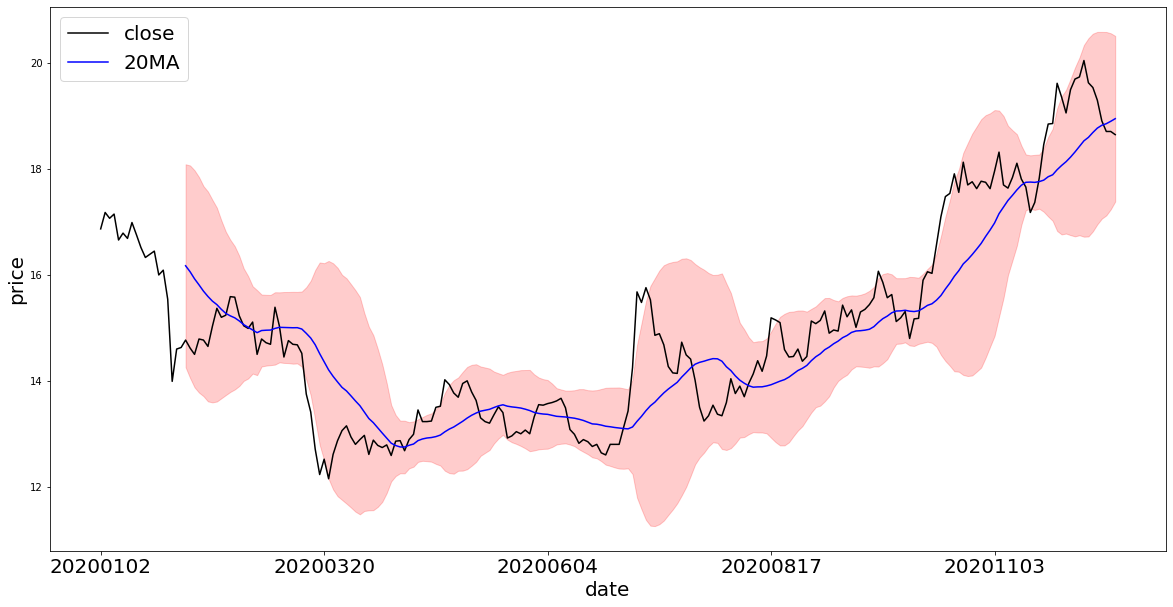

In [105]:
cprice['20MA'] = cprice['close'].rolling(20).mean()  ## 计算20日移动平均
cprice['20std'] = cprice['close'].rolling(20).std()   ## 计算20日移动标准差

## 绘制图像
plt.figure(figsize=(20,10))
plt.plot(cprice['close'], 'k', label='close')
plt.plot(cprice['20MA'], 'b', label='20MA')
plt.legend(loc='upper left',fontsize=20)
plt.fill_between(cprice.index, cprice['20MA']-2*cprice['20std'], cprice['20MA']+2*cprice['20std'], color='r', alpha=0.2)
plt.xticks(cprice.index[::50],fontsize=20);
plt.xlabel('date',fontsize=20);
plt.ylabel('price',fontsize=20);


<div id='ema'></div>

**Exponential Weighted Moving Average**

Exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

`DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)`
- com：类型float，可选。根据质心指定平滑系数α，α=1/(1+com), for com≥0。
- span：类型float，可选。根据范围指定平滑系数α，α=2/(span+1), for span≥1。
- halflife：类型float，可选。根据半衰期指定平滑系数α，α=1−exp(log(0.5)/halflife),for halflife>0。
- alpha：类型float，可选。直接指定平滑系数α，0<α≤1。
- min_periods：类型整数，默认为0。最少需要有值的观测点的数量。
- adjust：类型布尔，默认为True。决定指数加权的计算方式。
    > adjust = True: $Y_t=[1+(1-\alpha)X_{t-1}+...+(1-\alpha)^tX_0]/[1+(1-\alpha)+...+(1-\alpha)^t]$  
    > adjust = False: $Y_0=X_0$ and $Y_t=αX_t+(1−α)Y_t−1$
- ignore_na：类型布尔，默认为False。是否在加权计算中忽略nan的值。

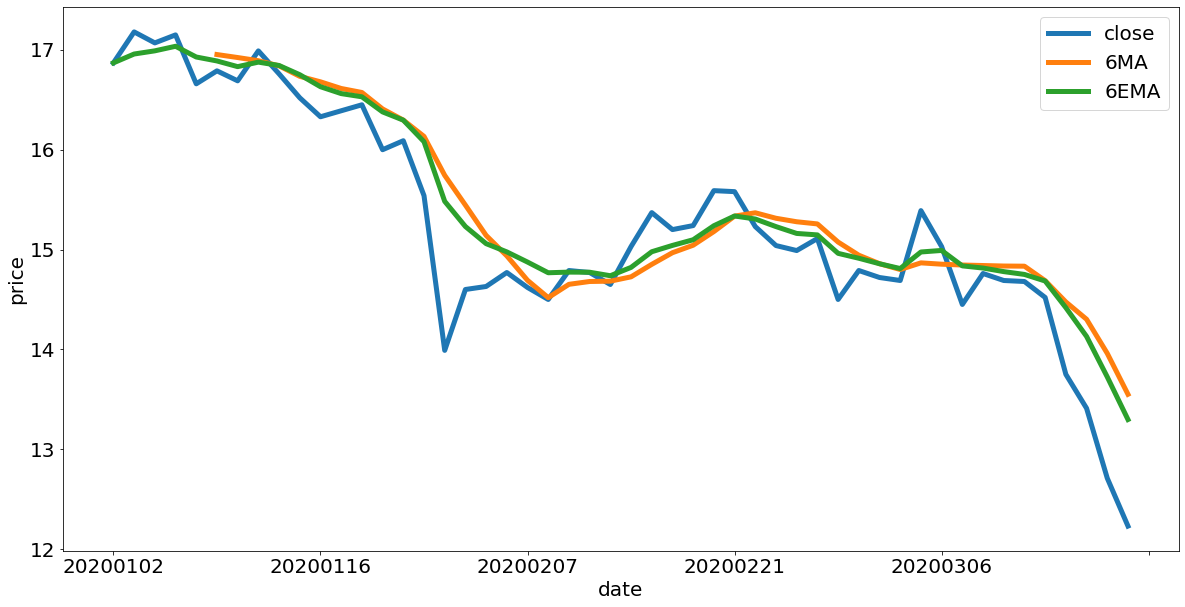

In [94]:
cprice['6MA'] = cprice['close'].rolling(6).mean()
cprice['6EMA'] = cprice['close'].ewm(span=6, adjust=False).mean()

cprice[['close','6MA','6EMA']].iloc[:50,:].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date',fontsize=20);
plt.ylabel('price',fontsize=20);
plt.legend(fontsize=20)

The EMA curve is more timely, or closer to the original (closing price) curve than the MA curve. 

**Exercise:**

1. 从tushare获取000001.SZ这只股票今年的日行情数据。
2. 绘制上述股票的12日指数滑动平均线(ema12)和26日指数滑动平均线(ema26)。
3. 计算时间序列dif = ema12 - ema26，以及dif序列的9日指数滑动平均线，后者命名为dea。
4. 绘制2x1的子图，子图1展示原始价格序列，子图2展示dif、dea以及(dif-dea)x2。

<div id='difference'></div>

**差分**

`DataFrame.diff(periods=1, axis=0)`  
`DataFrame.shift(periods=1, axis=0, fill_value=None)`

Notice：``dataframe - dataframe.shift(1)`` is same as ``dataframe.diff()``

In [6]:
cprice['diff']=cprice['close'].diff(1)
cprice['diff2']=cprice['close']-cprice['close'].shift(1)
cprice[['diff','diff2']]

,diff,diff2
trade_date,,
20200102,NaN,NaN
20200103,0.31,0.31
20200106,-0.11,-0.11
20200107,0.08,0.08
20200108,-0.49,-0.49
...,...,...
20201204,-0.24,-0.24
20201207,-0.39,-0.39
20201208,-0.20,-0.20


<div id='decompose'></div>

**分解**

`statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)`
- x: array_like.  
Time series.
- model: {“additive”, “multiplicative”}, optional.  
Type of seasonal component. Abbreviations are accepted.

In [ ]:
cprice['close'].isnull().any()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(cprice['close'], model="additive", period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(cprice['close'])
plt.xticks([])
plt.ylabel('price')
plt.subplot(412)
plt.plot(trend)
plt.xticks([])
plt.ylabel('trend')
plt.subplot(413)
plt.plot(seasonal)
plt.xticks([])
plt.ylabel('seasonal')
plt.ylim(seasonal.min(),seasonal.max())
plt.subplot(414)
plt.plot(residual)
plt.xticks([])
plt.ylabel('residual')

#### Statistical Funtions

- [Return](#return)(Percent change), [Volatility](#volatility)(Standard Deviation)
- [Covariance](#cov) and [Correlation](#corr)

<div id='return'></div>

**Return (Percent change)** 

$$R(t)=\frac{[P(t)-P(t-1)]}{P(t-1)}$$  
$$R_{log}(t)=log(P(t))-log(P(t-1))$$  

Series and DataFrame have a method `pct_change()` to compute the percent change over a given number of periods.


<AxesSubplot:xlabel='trade_date'>

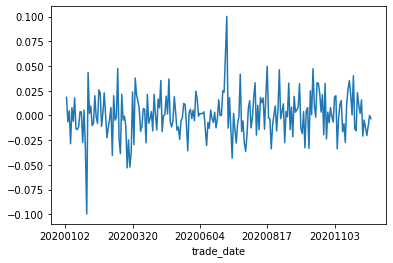

In [95]:
import numpy as np

cprice['return'] = cprice['close'].pct_change() # calculate return as change rate of price
#### cprice['log_return'] = np.log(cprice['close'].div(cprice['close'].shift(1))) # calculate log return
cprice['log_return'] = cprice['log_close'].diff(1) # calculate log return
cprice['return'].plot()
# cprice

<div id='volatility'></div>

**Volatility (Variance/Standard Deviation)**

***Formula***

1. Gather $N$ daily stock price and then determine the mean of the stock price. Let us assume the daily stock price on the $i$-th day as $P_i$ and the mean price as $\bar{P}$.

2. Next, compute the difference between each day’s stock price and the mean price, i.e., $P_i – \bar{P}$.

3. Next, compute the square root of all the deviations, $var(P)=\frac{1}{N-1}\sum_{i=1}^{N}{(P_{i} – \bar{P})^2}$, $std(P)=\sqrt{var(P)}$.

Notice the difference between `np.std()` and `pd.DataFrame.std()`

In [52]:
import numpy as np

std = cprice['close'].std()
var = cprice['close'].var() ## std**2
print('The variance and standard deviation of price are {} and {}.'.format(np.round(var,2), np.round(std,2)))

std2 = np.std(cprice['close'])
var2 = np.var(cprice['close']) ## std**2
print('The variance and standard deviation of price are {} and {}.'.format(np.round(var2,2), np.round(std2,2)))



The variance and standard deviation of price are 3.68 and 1.92.
The variance and standard deviation of price are 3.67 and 1.91.


<div id='cov'></div>

**Covariance**

cov(X,Y) = E[(X-E(X))(Y-E(Y))] = E(XY)-E(X)E(Y)

Given time-series measurements, $Y_1, Y_2,\ldots,Y_N$ and $X_1, X_2, \ldots, X_N$, the covariance is defined as:

$$cov(X,Y) = \frac{\sum_{i=1}^{N}\left ( Y_i - \bar{Y}\right ) \left ( X_{i} - \bar{X} \right )}{N-1}$$

Covariance may be computed using the `cov()` method.

<div id='corr'></div>

**Correlation**

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

Given time-series measurements, $Y_1, Y_2,\ldots,Y_N$ and $X_1, X_2, \ldots, X_N$, the correlation coefficient is defined as:

$$corr(X,Y) = \frac{\sum_{i=1}^{N}\left ( Y_i - \bar{Y}\right ) \left ( X_{i} - \bar{X} \right )}{\sqrt{\sum_{i=1}^{N}\left ( Y_i - \bar{Y}\right )^2}\sqrt{\sum_{i=1}^{N}\left ( X_i - \bar{X}\right )^2}} = \frac{cov(X,Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$


In finance, the correlation can measure the movement of a stock with that of a benchmark index, such as the CIS300, S&P500.

Correlation may be computed using the `corr()` method.

In [54]:
pro.index_basic(name='沪深300')

,ts_code,name,market,publisher,category,base_date,base_point,list_date
0,000300.SH,沪深300,SSE,中证公司,规模指数,20041231,1000.0,20050408


In [60]:
start_date='20200101'
end_date='20201129'

cis300 = pro.index_daily(ts_code='000300.SH', start_date=start_date, end_date=end_date)
stk1 = pro.daily(ts_code='600000.SH', start_date=start_date, end_date=end_date)
stk2 = pro.daily(ts_code='000001.SZ', start_date=start_date, end_date=end_date)
df = pd.DataFrame()
df['cis300'] = cis300['close']
df['600000.SH'] = stk1['close']
df['000001.SZ'] = stk2['close']
df.corr()

,cis300,600000.SH,000001.SZ
cis300,1.000000,-0.246603,0.662647
600000.SH,-0.246603,1.000000,-0.084028
000001.SZ,0.662647,-0.084028,1.000000


In [62]:
def get_price(code):
    start_date='20200101'
    end_date='20201210'
    df = pro.daily(ts_code=code, start_date=start_date, end_date=end_date)
    return df['close'][::1]

stocks = ['000001.SZ','000002.SZ','000004.SZ','600000.SH','601998.SH','601398.SH','601857.SH']

df = pd.DataFrame()
for stock in stocks:
    df[stock] = get_price(stock)
    
# plt.imshow(df.corr())
# plt.title("correlation matrix of stocks")
# plt.show()

Text(0.5, 1.0, 'correlation matrix of stocks')

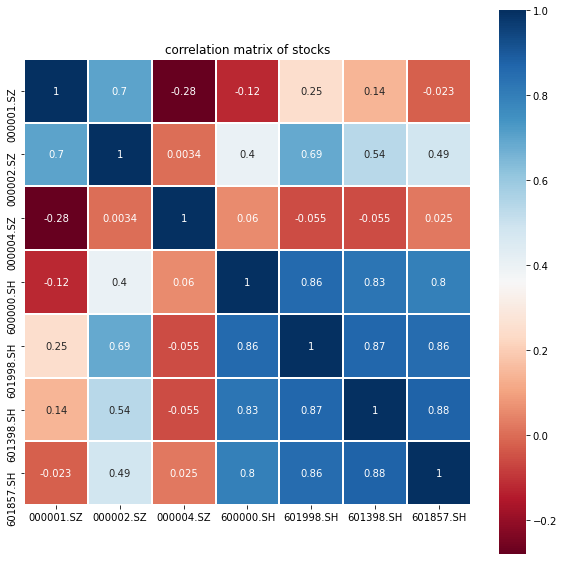

In [80]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))

svm = sns.heatmap(df.corr(), vmax=1, cmap=colormap, linewidths=1, linecolor='white', annot=True, square=True, 
                  xticklabels=True, yticklabels=True)

plt.title("correlation matrix of stocks")

**Exercise:**
    
    1. 使用np.corrcoef()计算上述几只股票的相关系数
    2. 练习计算它们的协方差矩阵

<div id='ac'></div>

**Autocorrelation plot**

Autocorrelation plots are often used for **checking randomness in time series**. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. 

***Formula***

Given time-series measurements, $Y_1, Y_2,\ldots,Y_N$ at time $1, 2, \ldots, N$, the lag $k$ autocorrelation function is defined as:

$$A_k = \frac{\sum_{i=1}^{N-k}\left ( Y_i - \bar{Y}\right ) \left ( Y_{i+k} - \bar{Y} \right )}{\sum_{i=1}^{N-k}\left ( Y_i - \bar{Y}\right )^2}$$

Plotting the Autocorrelation Plot on a graph can be done using the ``autocorrelation_plot()`` method of the plotting module. This function generates the Autocorrelation plot for time series. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

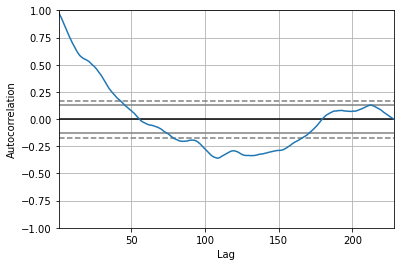

In [52]:
pd.plotting.autocorrelation_plot(cprice['close'])

**Exercise：**

    绘制收益率的自相关函数图像，比较其与价格的自相关函数图像的差别。